**IMPORTING NECESSARY LIBRARIES**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

**LOADING THE DATASET**

In [2]:
data=pd.read_csv("cleaned_loan.csv")

In [3]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
data.head()

,loannumber,loanamount,totaldue,termdays,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,creationdate_dow,additional_charges,...,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank
0,12.0,30000.0,34500.0,30.0,0.0,3.432010,6.433055,0.0,1.0,4500.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,15000.0,17250.0,30.0,1.0,3.885298,7.320700,0.0,2.0,2250.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,20000.0,22250.0,15.0,0.0,11.139350,10.292041,0.0,3.0,2250.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,10000.0,11500.0,15.0,1.0,3.985770,7.491708,0.0,3.0,1500.0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,40000.0,44000.0,30.0,0.0,7.457913,9.076574,0.0,0.0,4000.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.isnull().sum()

loannumber                       0
loanamount                       0
totaldue                         0
termdays                         0
bank_account_type                0
                                ..
bank_name_clients_UBA            0
bank_name_clients_Union Bank     0
bank_name_clients_Unity Bank     0
bank_name_clients_Wema Bank      0
bank_name_clients_Zenith Bank    0
Length: 78, dtype: int64

**SEGGREAGATING DEPENDENT AND INDEPENDENT VARIABLES**

In [6]:
#seperating independent and dependent variables
x=data.drop('good_bad_flag',axis=1)
y=data['good_bad_flag'].replace({'Good':0, 'Bad':1})

**SPLITTING DATA INTO TRAIN AND TEST**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=0.2, stratify=y)


#Scalig the train and test datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

**IMPLEMENTING KNN**

In [8]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import f1_score

In [9]:
clf=knn(n_neighbors=1)
clf.fit(x_train,y_train)

# Predicting over the Train Set and calculating F1
train_pred=clf.predict(x_train)
train_score=f1_score(train_pred,y_train)
print('Train score :',train_score)

# Predicting over the Test Set and calculating F1
test_pred=clf.predict(x_test)
test_score=f1_score(test_pred,y_test)
print('Test score :',test_score)

Train score : 0.9980276134122288
Test score : 0.2402234636871508


# 
**Checking the Training F1 and Test F1curve**

In [10]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = knn(n_neighbors = i)
        clf.fit(x_train, y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x_train)
        tmp = f1_score(tmp,y_train)
        train_f1.append(tmp)
    
        tmp = clf.predict(x_test)
        tmp = f1_score(tmp,y_test)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [11]:
#Defining K range
k = range(1,150,2)

In [12]:
# calling above defined function
train_f1, test_f1 = F1score(k)

In [13]:
score=pd.DataFrame({'train_score':train_f1,'test_score':test_f1})
score

,train_score,test_score
0,0.998028,0.240223
1,0.564309,0.261745
2,0.430469,0.236162
3,0.390198,0.258824
4,0.332039,0.257028
...,...,...
70,0.140680,0.108911
71,0.140515,0.099502
72,0.136150,0.090000
73,0.132231,0.090000


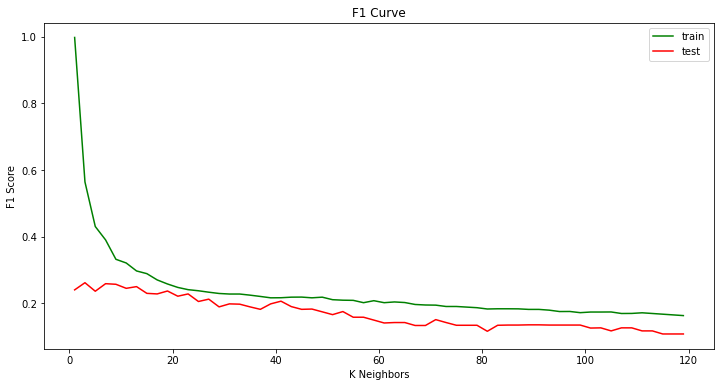

In [15]:
plt.figure(figsize=(12,6))
plt.plot(k[0:60],train_f1[0:60],color='green',label='train')
plt.plot(k[0:60],test_f1[0:60],color='red',label='test')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.legend()


# Lets check with changing random state

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.2, stratify=y)


#Scalig the train and test datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [17]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import f1_score

In [18]:
clf=knn(n_neighbors=1)
clf.fit(x_train,y_train)

# Predicting over the Train Set and calculating F1
train_pred=clf.predict(x_train)
train_score=f1_score(train_pred,y_train)
print('Train score :',train_score)

# Predicting over the Test Set and calculating F1
test_pred=clf.predict(x_test)
test_score=f1_score(test_pred,y_test)
print('Test score :',test_score)

Train score : 0.9973684210526316
Test score : 0.2865013774104684


In [19]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = knn(n_neighbors = i)
        clf.fit(x_train, y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x_train)
        tmp = f1_score(tmp,y_train)
        train_f1.append(tmp)
    
        tmp = clf.predict(x_test)
        tmp = f1_score(tmp,y_test)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [20]:
#Defining K range
k = range(1,150,2)

In [21]:
# calling above defined function
train_f1, test_f1 = F1score(k)

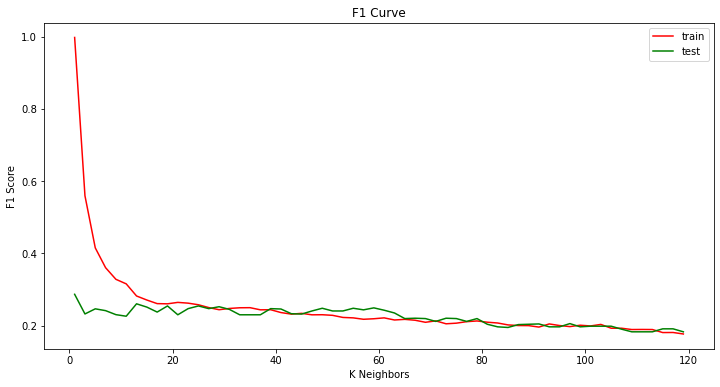

In [22]:
plt.figure(figsize=(12,6))
plt.plot(k[0:60],train_f1[0:60],color='red',label='train')
plt.plot(k[0:60],test_f1[0:60],color='green',label='test')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.legend()

In [23]:
clf=knn(n_neighbors=24)
clf.fit(x_train,y_train)

# Predicting over the Train Set and calculating F1
train_pred=clf.predict(x_train)
train_score=f1_score(train_pred,y_train)
print('Train score :',train_score)

# Predicting over the Test Set and calculating F1
test_pred=clf.predict(x_test)
test_score=f1_score(test_pred,y_test)
print('Test score :',test_score)

Train score : 0.2374727668845316
Test score : 0.24786324786324784
